# Word Decomposition Tree

In this notebook we will investigate one of the [MIT Technology Review Puzzle Corner](https://cs.nyu.edu/~gottlieb/tr/back-issues/) puzzles from [this article](https://www.theguardian.com/science/2020/feb/10/can-you-solve-it-are-you-smart-enough-for-mit):

*The 9-letter word SPLATTERS has an intriguing property. You can remove a single letter to make an 8-letter word, without rearranging the other letters. You can remove another letter to make a 7-letter word, and then a 6-letter word, and so on down to a single-letter word.*

*At no stage is the order of the letters rearranged.*

*Find two other 9-letter words that share the same property.*

### Python Libraries

We will use a few different Python libraries:

`pyspellchecker` to test if fragments are words (this needs to be installed)

`pandas` for creating and manipulating dataframes

`numpy` to find values in a dataframe

`graphviz` for creating the tree visualization

In [1]:

!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
import pandas as pd
import numpy as np
from graphviz import Digraph
dot = Digraph()
print('Libraries imported, we are ready to go.')

Libraries imported, we are ready to go.


## Defining Functions

Let's define a function for checking if a particular word fragment is a word, and another function for finding the "children" of a word by removing a letter from each possible position.

In [2]:
def is_word(word_fragment):
    if len(word_fragment) == 1: # despite what the dictionary says, there should only be two single-letter English words
        if word_fragment == 'a' or word_fragment == 'i':
            is_word_boolean = True
        else:
            is_word_boolean = False
    else:
        is_word_boolean = spell.correction(word_fragment) == word_fragment # if the correct spelling is the same as the word, then it's a word
    return is_word_boolean

def find_child_words(word):
    child_word_list = []
    for index in range(len(word)):
        child_word = word[:index] + word[index+1:]
        if is_word(child_word):
            child_word_list.append(child_word)
    return child_word_list

print('Functions defined')

Functions defined


## Decomposing a Word

Starting with the suggested word `splatters`, we will create a dataframe of "child words" (along with the lenght of each child word) and their "parent words".

In [3]:
starting_word = 'splatters'
#starting_word = 'sparkling'
#starting_word = 'startling'

df = pd.DataFrame(columns=['Length', 'Word', 'Parent'])
def add_to_word_df(df, child_word, parent_word):
    df = df.append({'Length': len(child_word), 'Word': child_word, 'Parent': parent_word}, ignore_index=True)
    return df
df = add_to_word_df(df, starting_word, 'NA')

for iterator in range(len(starting_word), 1, -1): # count down iterator
    parent_word_list = df[df['Length']==iterator]['Word'].values.tolist() # for each word that is iterator length
    for parent_word in parent_word_list:
        child_word_list = find_child_words(parent_word)
        for child_word in child_word_list:
            df = add_to_word_df(df, child_word, parent_word)

df.head(10)

,Length,Word,Parent
0,9,splatters,NA
1,8,platters,splatters
2,8,splatter,splatters
3,7,patters,platters
4,7,platter,platters
5,7,platter,splatter
6,7,slatter,splatter
7,7,spatter,splatter
8,6,patter,patters
9,6,latter,platter


# Manipulating the Dataframe

Now that we've created a data set of possible words and their "children", let's manipulate it so that we have just the unique child words and associated lists of their parent words.

We'll use this to create the tree visualization later.

In [4]:
df_unique_multiple_parents = df.drop_duplicates('Word') # remove duplicate child words
df_unique_multiple_parents.reset_index(drop=True, inplace=True) # re-number the rows
for row_number, row in df_unique_multiple_parents.iterrows():
    row[2] = df[df['Word']==row[1]]['Parent'].drop_duplicates().tolist() # add a list of parent words for each child word

df_unique_multiple_parents.head(10)

,Length,Word,Parent
0,9,splatters,[NA]
1,8,platters,[splatters]
2,8,splatter,[splatters]
3,7,patters,[platters]
4,7,platter,"[platters, splatter]"
5,7,slatter,[splatter]
6,7,spatter,[splatter]
7,6,patter,"[patters, platter, spatter]"
8,6,latter,"[platter, slatter]"
9,6,slater,[slatter]


# Visualizing the Word Tree

From this new dataframe of unique child words and lists of their parent words, we can create a word tree.

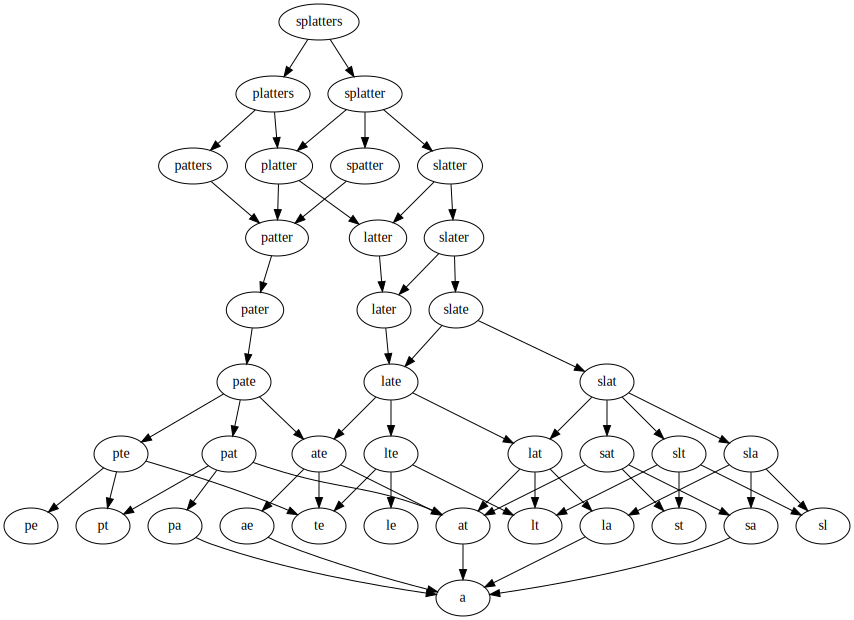

In [5]:
for row_index, row in df_unique_multiple_parents.iterrows():
    word = row['Word']
    if row_index == 0: # do this for the first row, which has no parent
        dot.node(str(row_index), word)
    else:
        dot.node(str(row_index), word)
        parent_list = row['Parent']
        for parent_word in parent_list:
            parent_index = np.where(df_unique_multiple_parents['Word'] == parent_word)[0][0]
            dot.edge(str(parent_index), str(row_index))

# display the tree
dot

# Conclusion

According to the [solutions page](https://www.theguardian.com/science/2020/feb/10/did-you-solve-it-are-you-smart-enough-for-mit), The two other nine-letter words that share this "decomposable" property are `sparkling` and `startling`. Try this out using those two words.

As well, there is a [Snopes article](https://www.snopes.com/fact-check/nine-letters-puzzle/) discussing other possible solutions, including some ten-letter possibilities.

It might be an interesting challenge to use some of the above code to check all possible nine-letter English words to see which are decomposible in this manner.